In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import copy

In [2]:
inventory_sets_df = pd.read_csv('inventory_sets.csv')
inventories_df = pd.read_csv('inventories.csv')
inventory_parts_df = pd.read_csv('inventory_parts.csv')
colors_df = pd.read_csv('colors.csv')
parts_df = pd.read_csv('parts.csv')
part_categories_df = pd.read_csv('part_categories.csv')
themes_df = pd.read_csv('themes.csv')
sets_df = pd.read_csv('sets.csv')

In [3]:
part_categories_df.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [4]:
parts_df.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [5]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [6]:
sets_df.describe()

,year,theme_id,num_parts
count,11673.000000,11673.000000,11673.000000
mean,2001.972758,311.308575,162.262400
std,13.475364,177.999101,330.192108
min,1950.000000,1.000000,-1.000000
25%,1997.000000,161.000000,10.000000
50%,2005.000000,324.000000,45.000000
75%,2012.000000,470.000000,172.000000
max,2017.000000,614.000000,5922.000000


In [7]:
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [8]:
parts_with_categories = pd.merge(left=part_categories_df, right=parts_df, left_on='id', right_on='part_cat_id')
parts_with_categories = parts_with_categories.rename(columns={'name_x': 'Part_Category_Name', 'name_y':'Part_Name'})
parts_with_categories.head(20)

,id,Part_Category_Name,part_num,Part_Name,part_cat_id
0,1,Baseplates,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
1,1,Baseplates,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
2,1,Baseplates,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
3,1,Baseplates,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1
4,1,Baseplates,10,Baseplate 24 x 32,1
5,1,Baseplates,10a,Baseplate 24 x 32 with Squared Corners,1
6,1,Baseplates,10b,Baseplate 24 x 32 with Rounded Corners,1
7,1,Baseplates,10p01,Baseplate 24 x 32 with Dots Print [363 / 555],1
8,1,Baseplates,10p02,Baseplate 24 x 32 with Dots Print [354 / 560-2],1
9,1,Baseplates,10p03,Baseplate 24 x 32 with Dots Print [358],1


In [9]:
print("Columns in 'parts_with_categories':", parts_with_categories.columns)
print("Columns in 'inventory_parts_df':", inventory_parts_df.columns)

Columns in 'parts_with_categories': Index(['id', 'Part_Category_Name', 'part_num', 'Part_Name', 'part_cat_id'], dtype='object')
Columns in 'inventory_parts_df': Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare'], dtype='object')


In [10]:
part_color = pd.merge(parts_with_categories, inventory_parts_df, left_on='part_num', right_on='part_num', how='left')
part_color = pd.merge(part_color, colors_df, left_on='color_id', right_on='id', how='left')
part_color = part_color.rename(columns={'name': 'color_name'})
part_color = part_color[['Part_Category_Name', 'Part_Name', 'color_name', 'quantity', 'is_spare','rgb']]
part_color.head(20)

,Part_Category_Name,Part_Name,color_name,quantity,is_spare,rgb
0,Baseplates,Baseplate 16 x 30 with Set 080 Yellow House Print,Green,1.0,f,237841
1,Baseplates,Baseplate 16 x 24 with Set 080 Small White Hou...,Green,1.0,f,237841
2,Baseplates,Baseplate 16 x 24 with Set 080 Red House Print,Green,1.0,f,237841
3,Baseplates,Baseplate 16 x 24 with Set 080 Large White Hou...,Green,1.0,f,237841
4,Baseplates,Baseplate 24 x 32,NaN,NaN,NaN,NaN
5,Baseplates,Baseplate 24 x 32 with Squared Corners,Green,1.0,f,237841
6,Baseplates,Baseplate 24 x 32 with Squared Corners,Green,1.0,f,237841
7,Baseplates,Baseplate 24 x 32 with Squared Corners,Green,1.0,f,237841
8,Baseplates,Baseplate 24 x 32 with Squared Corners,Green,1.0,f,237841
9,Baseplates,Baseplate 24 x 32 with Rounded Corners,Green,1.0,f,237841


In [11]:
part_color.describe()

,quantity
count,580069.000000
mean,3.325141
std,8.230862
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1440.000000


In [12]:
part_color = part_color.groupby(['color_name'])['color_name'].count()

In [13]:
part_color.head(30)

color_name
Aqua                        96
Black                   115085
Blue                     29855
Blue-Violet                 67
Bright Green              1695
Bright Light Blue          326
Bright Light Orange       1974
Bright Light Yellow        275
Bright Pink               1423
Brown                     3462
Chrome Antique Brass        16
Chrome Black                 3
Chrome Blue                 19
Chrome Gold                781
Chrome Green                 2
Chrome Pink                 24
Chrome Silver              534
Copper                      87
Dark Azure                 470
Dark Blue                 3755
Dark Blue-Violet             4
Dark Bluish Gray         43907
Dark Brown                1964
Dark Flesh                  84
Dark Gray                 7611
Dark Green                2001
Dark Orange               1386
Dark Pink                 1533
Dark Purple               1679
Dark Red                  4393
Name: color_name, dtype: int64

In [14]:
part_color.sort_values(ascending=False)

color_name
Black                     115085
White                      66536
Light Bluish Gray          55302
Red                        50213
Dark Bluish Gray           43907
                           ...  
Very Light Orange              2
Very Light Gray                2
Chrome Green                   2
Medium Violet                  2
Trans Light Royal Blue         1
Name: color_name, Length: 131, dtype: int64

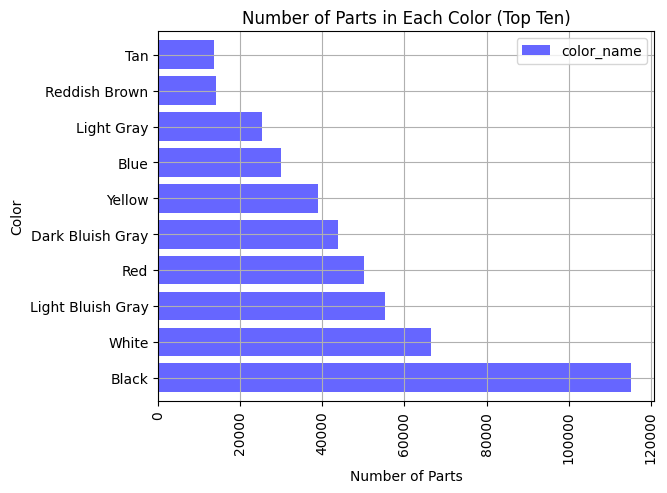

In [15]:
top_ten_partcolors = part_color.nlargest(10, keep='first')
top_ten_partcolors

top_ten_partcolors.plot(kind="barh", color="blue", alpha=0.6, width=0.8)

plt.xlabel('Number of Parts')
plt.ylabel('Color')
plt.title('Number of Parts in Each Color (Top Ten)')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

In [16]:
parts_with_categories = parts_with_categories['Part_Category_Name'].value_counts()
parts_with_categories.sort_values(ascending=False)

Part_Category_Name
Minifigs                                        8556
Minifig Accessories                             2071
Non-LEGO                                        1964
Duplo, Quatro and Primo                         1552
Tiles Printed                                   1191
Other                                           1125
Bionicle, Hero Factory and Constraction         1116
Bricks Printed                                   744
Plants and Animals                               742
Power Functions, Mindstorms and Electric         462
Flags, Signs, Plastics and Cloth                 428
Bricks Sloped                                    410
Transportation - Land                            409
Windows and Doors                                405
Clikits                                          278
Bricks Curved                                    275
Wheels and Tyres                                 270
Windscreens and Fuselage                         268
Baseplates                 

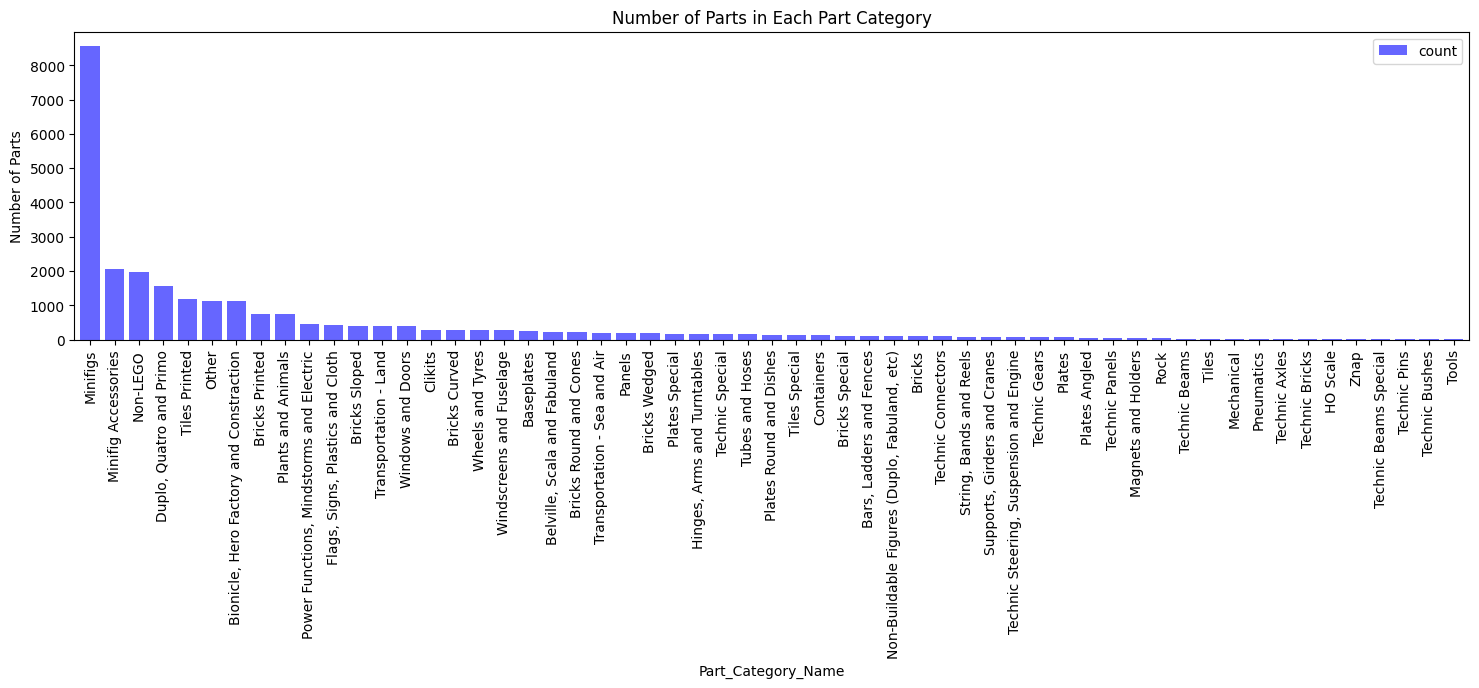

In [17]:
fig, axs = plt.subplots(figsize=(18,4))
parts_with_categories.plot(kind="bar", color="blue", alpha=0.6, width= 0.8)

plt.ylabel('Number of Parts')
plt.title('Number of Parts in Each Part Category')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [18]:
parts_df.describe()

,part_cat_id
count,25993.000000
mean,19.491825
std,12.314862
min,1.000000
25%,13.000000
50%,13.000000
75%,27.000000
max,57.000000


In [19]:
inventory_parts_df.describe()

,inventory_id,color_id,quantity
count,580251.000000,580251.000000,580251.000000
mean,8605.285444,78.472787,3.324730
std,4958.375522,622.238597,8.229816
min,1.000000,-1.000000,1.000000
25%,4352.000000,1.000000,1.000000
50%,8635.000000,15.000000,2.000000
75%,12794.000000,71.000000,4.000000
max,18708.000000,9999.000000,1440.000000


In [20]:
unique_inventory_parts = inventory_parts_df[['color_id', 'inventory_id']]
unique_inventory_parts = unique_inventory_parts.groupby('inventory_id').count()

# taking out the top 15 inventory parts with most colors available
inventory_parts_most_colors = unique_inventory_parts.sort_values(by='color_id', ascending=False)
inventory_parts_most_colors = inventory_parts_most_colors[0:15]
inventory_parts_most_colors

,color_id
inventory_id,
1305,769
12397,700
8461,687
16139,593
14208,592
7869,591
12656,578
12798,554
8438,519


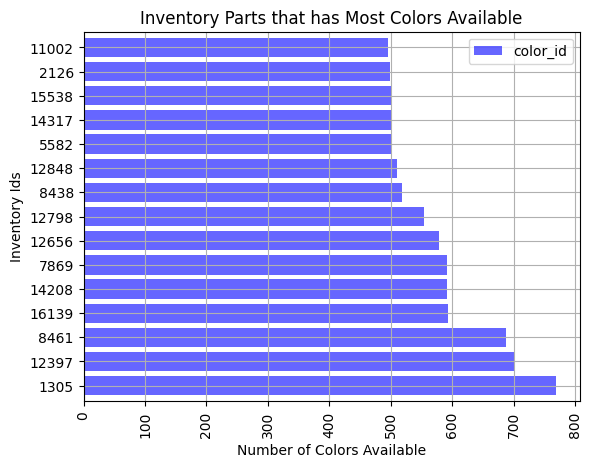

In [21]:
inventory_parts_most_colors['color_id'].plot(kind="barh", color="blue", alpha=0.6, width= 0.8)

plt.xlabel('Number of Colors Available')
plt.ylabel('Inventory Ids')
plt.title('Inventory Parts that has Most Colors Available')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
axs.set_xticks(np.arange(0,800,20))

plt.show()

In [22]:
data_parts_min = sets_df.sort_values(by = ['num_parts'])
data_parts_min.head(20)

,set_num,name,year,theme_id,num_parts
11645,Vancouver-1,"LEGO Store Grand Opening Exclusive Set, Oakrid...",2012,408,-1
1683,240-1,"Wooden Storage Box Large, Empty",1967,383,-1
6545,66392-1,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",2012,506,-1
1837,2852726-1,Gyroscopic Sensor for Mindstorms NXT,2011,259,0
11144,DKIDEASBOOK-1,The LEGO Ideas Book,2011,501,0
10152,8805-0,Minifigure Series 5 [Random Bag],2011,540,0
4615,5001096-1,Batman™ 2: DC Super Heroes - Xbox 360,2012,501,0
4613,5000672-1,The LEGO® Ideas Book,2011,497,0
4612,5000646-1,City poster,2012,501,0
4610,5000642-1,Star Wars poster,2012,501,0


In [23]:
sets_data = sets_df[sets_df['num_parts'] > 0]
sets_data = sets_data.sort_values(by = ['num_parts'])
sets_data.head()

,set_num,name,year,theme_id,num_parts
8255,757-1,Storage Tray,1987,443,1
403,10701-1,Gray Baseplate,2015,365,1
4195,45517-1,Transformer 10V DC,2016,518,1
401,10700-1,Green Baseplate,2015,365,1
400,10699-1,Sand Baseplate,2015,365,1


In [24]:
# Outlier functions

def get_bounds(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)

  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  # For our domain, negative values make no sense
  lower_bound = max(lower_bound, 0)

  return lower_bound, upper_bound

def get_outliers(data):
  lower_bound, upper_bound = get_bounds(data)

  outliers = []

  for i in range(len(data)):
      if (data[i] < lower_bound) | (data[i] > upper_bound):
          outliers.append(data[i])

  return outliers

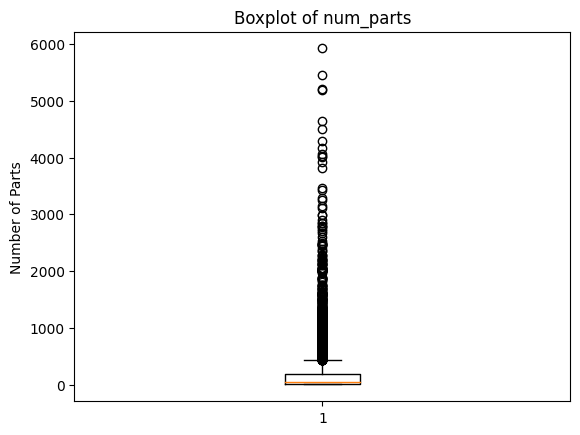

In [25]:
plt.boxplot(sets_data['num_parts'])

plt.title('Boxplot of num_parts')
plt.ylabel('Number of Parts')

plt.show()

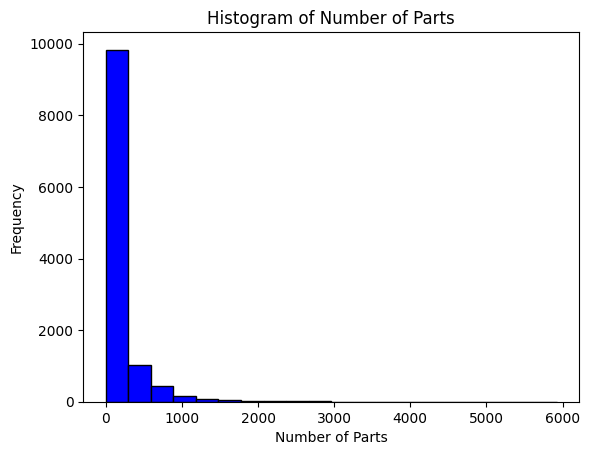

In [26]:
plt.hist(sets_df['num_parts'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Number of Parts')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Parts')

plt.show()

In [27]:
sets_data = sets_data[sets_data['num_parts'] > 0]
sets_data = sets_data.sort_values(by = ['num_parts'])
sets_data.head()

,set_num,name,year,theme_id,num_parts
8255,757-1,Storage Tray,1987,443,1
5937,620-3,Blue Building Plate 32 x 32,2010,48,1
516,1118-1,"Boat Weight, Red",1977,443,1
7924,740-2,12V Transformer for 220V Pack,1969,242,1
4925,5113-1,TECHNIC Airscrew,1987,453,1


In [28]:
sets_data.describe()

,year,theme_id,num_parts
count,11197.000000,11197.000000,11197.000000
mean,2001.731625,305.561490,169.160668
std,13.481017,177.348374,335.402833
min,1950.000000,1.000000,1.000000
25%,1996.000000,158.000000,14.000000
50%,2005.000000,306.000000,49.000000
75%,2012.000000,467.000000,183.000000
max,2017.000000,614.000000,5922.000000


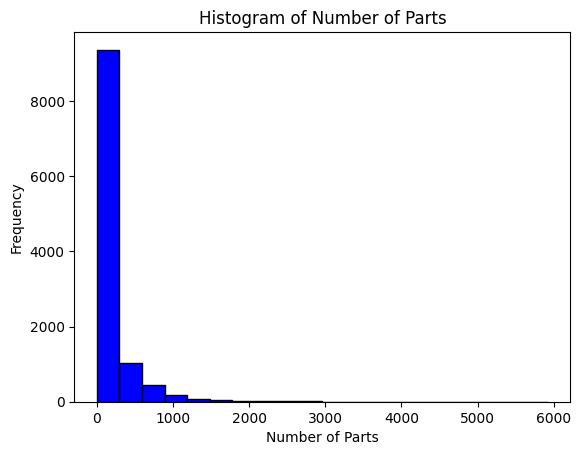

In [29]:
plt.hist(sets_data['num_parts'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Number of Parts')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Parts')

plt.show()

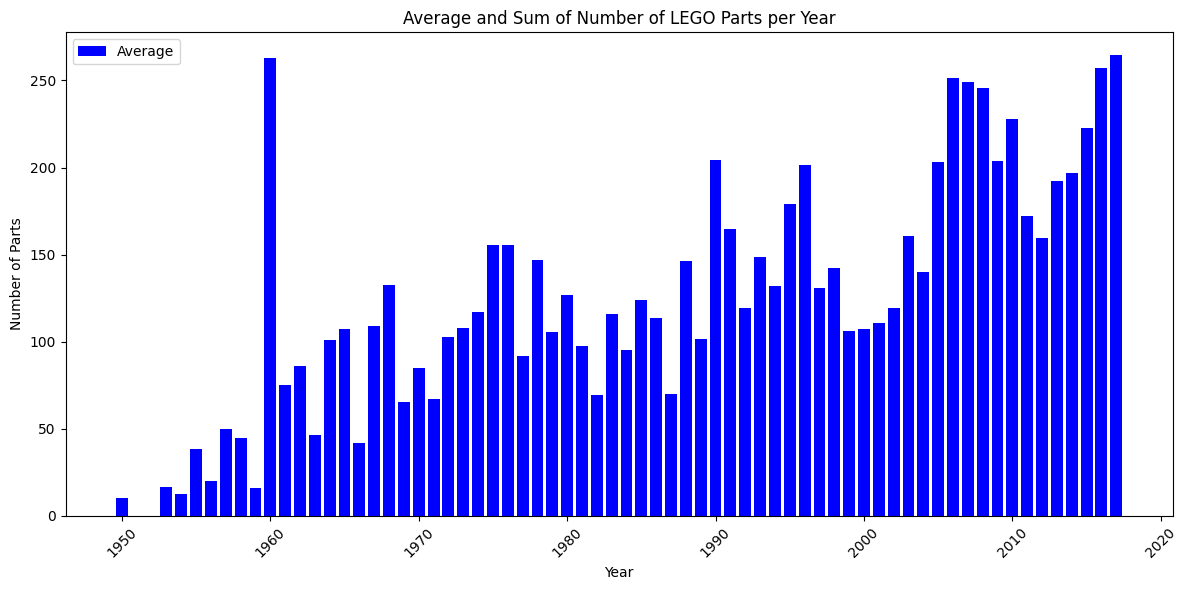

In [30]:
grouped = sets_data.groupby('year')['num_parts']
avg_num_parts_per_year = grouped.mean().reset_index()
sum_num_parts_per_year = grouped.sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_num_parts_per_year['year'], avg_num_parts_per_year['num_parts'], color='blue', label='Average')

plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Average and Sum of Number of LEGO Parts per Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


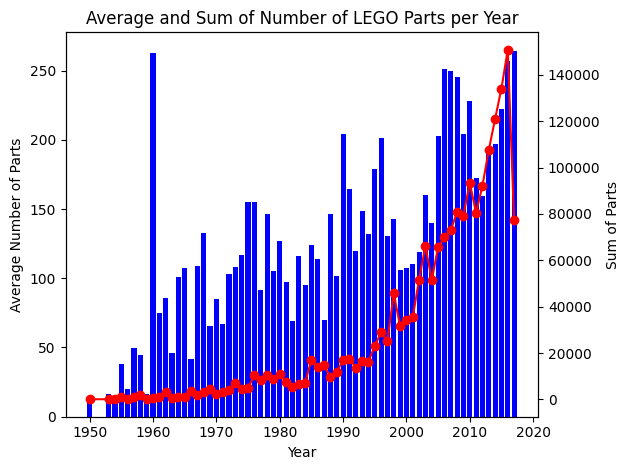

In [31]:
grouped = sets_data.groupby('year')['num_parts']
avg_num_parts_per_year = grouped.mean().reset_index()
sum_num_parts_per_year = grouped.sum().reset_index()

fig, ax1 = plt.subplots()

ax1.bar(avg_num_parts_per_year['year'], avg_num_parts_per_year['num_parts'], color='blue', label='Average')
ax1.set_ylabel('Average Number of Parts')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()

ax2.plot(sum_num_parts_per_year['year'], sum_num_parts_per_year['num_parts'], color='red', marker='o', label='Sum')
ax2.set_ylabel('Sum of Parts')

plt.title('Average and Sum of Number of LEGO Parts per Year')
fig.tight_layout()
plt.show()


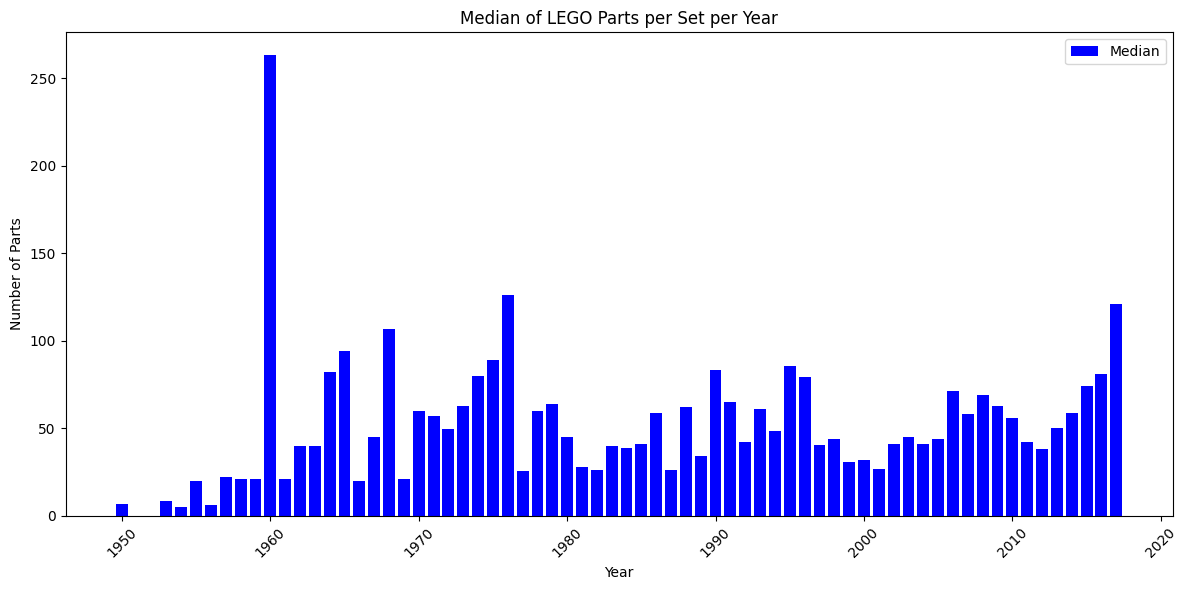

In [32]:
grouped = sets_data.groupby('year')['num_parts']
median_num_parts_per_year = grouped.median().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(median_num_parts_per_year['year'], median_num_parts_per_year['num_parts'], color='blue', label='Median')

plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Median of LEGO Parts per Set per Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

    year  num_parts
0   1950         24
1   1953         48
2   1954         54
3   1955        200
4   1956         96
..   ...        ...
61  2013       2988
62  2014       3294
63  2015       2995
64  2016       4640
65  2017       4009

[66 rows x 2 columns]


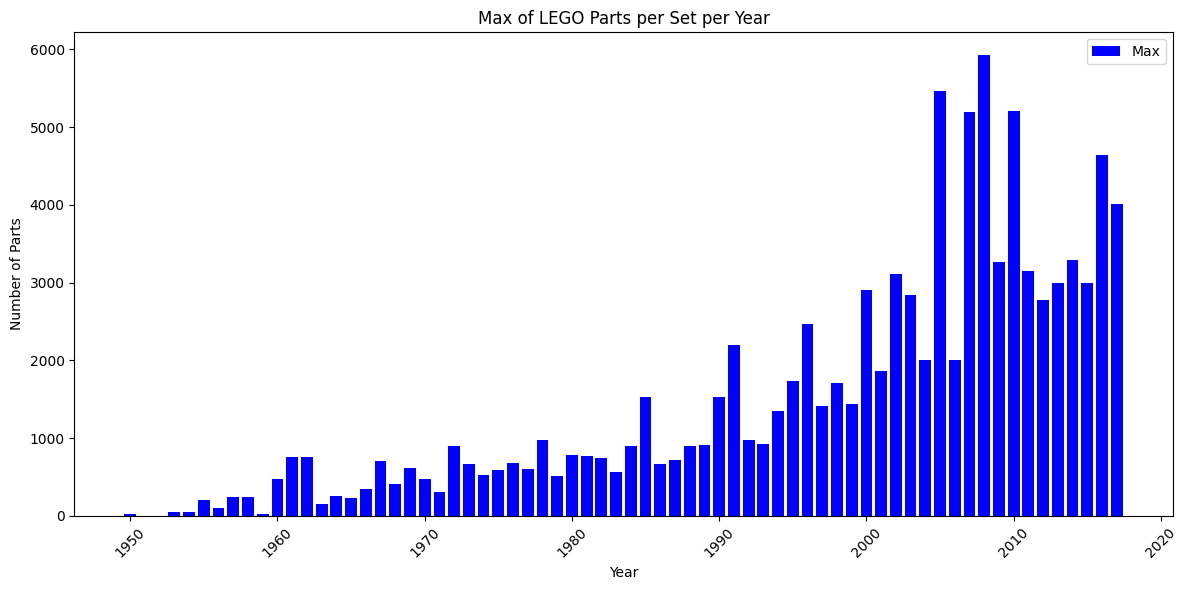

In [33]:
max_num_parts_per_year = grouped.max().reset_index()

print(max_num_parts_per_year)

plt.figure(figsize=(12, 6))
plt.bar(max_num_parts_per_year['year'], max_num_parts_per_year['num_parts'], color='blue', label='Max')

plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Max of LEGO Parts per Set per Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

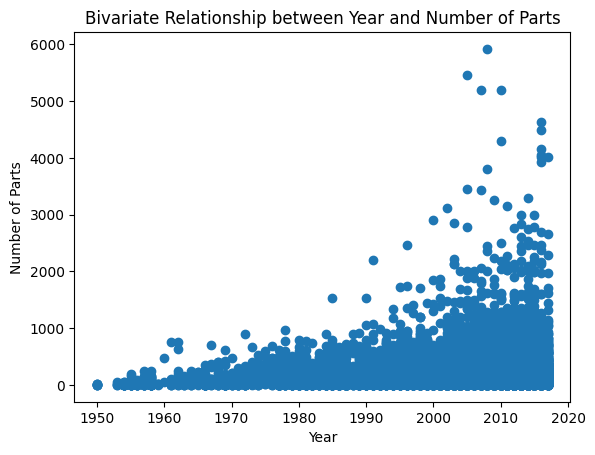

In [34]:
plt.scatter(sets_data['year'], sets_data['num_parts'])
plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Bivariate Relationship between Year and Number of Parts')
plt.show()

In [35]:
themes_by_year = sets_df.groupby('year').agg({'theme_id' : pd.Series.nunique })

In [36]:
themes_by_year.rename(columns={'theme_id':'nr_themes'},inplace=True)

In [37]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1950,7,7,7,7
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
1956,12,12,12,12


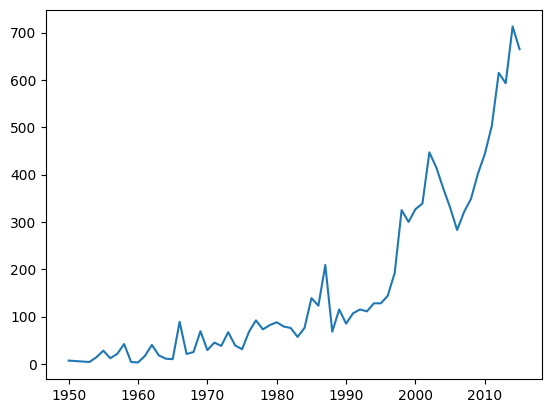

In [38]:
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2])
plt.show()

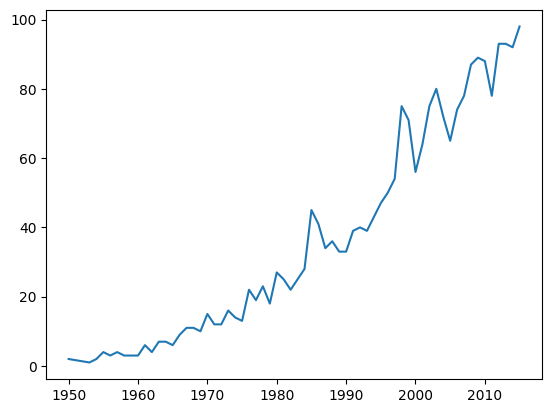

In [39]:
plt.plot(themes_by_year.index[:-2],themes_by_year['nr_themes'][:-2])
plt.show()

Text(0, 0.5, 'number of themes')

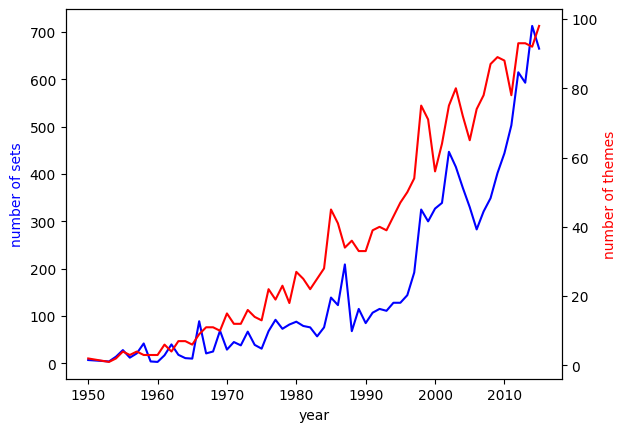

In [40]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color='b')
ax2.plot(themes_by_year.index[:-2],themes_by_year.nr_themes[:-2],color='r')

ax1.set_xlabel('year')
ax1.set_ylabel('number of sets',color='b')
ax2.set_ylabel('number of themes',color='r')

In [41]:
parts_per_set = sets_df.groupby('year').agg({'num_parts':pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1950,10.142857
1953,16.500000
1954,12.357143
1955,36.857143
1956,18.500000


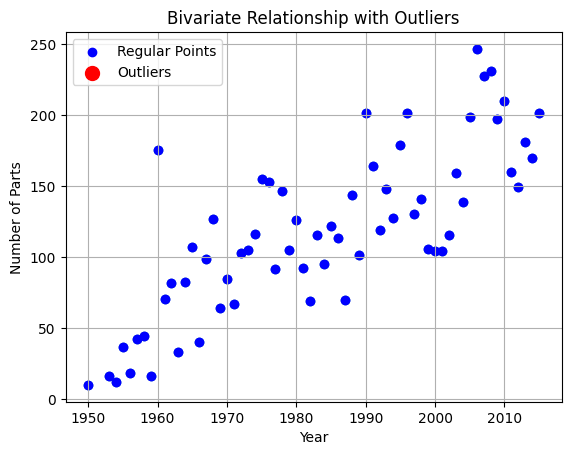

In [42]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])

x = np.array([parts_per_set.index[:-2]])
y = np.array([parts_per_set.num_parts[:-2]])

z_scores_x = (x - np.mean(x)) / np.std(x)
z_scores_y = (y - np.mean(y)) / np.std(y)

outlier_threshold = 2.5

outliers_x = np.abs(z_scores_x) > outlier_threshold
outliers_y = np.abs(z_scores_y) > outlier_threshold

plt.scatter(x[~outliers_x], y[~outliers_y], color='blue', marker='o', label='Regular Points')
plt.scatter(x[outliers_x], y[outliers_x], color='red', marker='o', s=100, label='Outliers')

plt.title('Bivariate Relationship with Outliers')
plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
parts_per_set.describe()

,num_parts
count,66.000000
mean,122.574711
std,62.255943
min,10.142857
25%,83.175549
50%,116.419703
75%,159.988468
max,260.820946


In [44]:
merged_df = pd.merge(parts_df, part_categories_df, left_on='part_cat_id', right_on='id', how='outer')

In [45]:
merged_df.head(10000)

,part_num,name_x,part_cat_id,id,name_y
0,0687b1,Set 0687 Activity Booklet 1,17,17,Non-LEGO
1,10016414,Sticker Sheet #1 for 41055-1,17,17,Non-LEGO
2,10019stk01,Sticker for Set 10019 - (43274/4170393),17,17,Non-LEGO
3,10026stk01,Sticker for Set 10026 - (44942/4184185),17,17,Non-LEGO
4,10029stk01,Sticker for Set 10029 - (4216816),17,17,Non-LEGO
...,...,...,...,...,...
9995,973pr3439c01,MINI UPPER PART NO. 3439,13,13,Minifigs
9996,973pr3440c01,MINI UPPER PART NO. 3440,13,13,Minifigs
9997,973pr3441c01,MINI UPPER PART NO. 3441,13,13,Minifigs
9998,973pr3442c01,MINI UPPER PART NO. 3442,13,13,Minifigs


In [46]:
merged_df.describe()

,part_cat_id,id
count,25993.000000,25993.000000
mean,19.491825,19.491825
std,12.314862,12.314862
min,1.000000,1.000000
25%,13.000000,13.000000
50%,13.000000,13.000000
75%,27.000000,27.000000
max,57.000000,57.000000


In [47]:
inventory_parts_merged = pd.merge(merged_df, inventory_parts_df, left_on='part_num', right_on='part_num', how='outer')

In [48]:
inventory_parts_merged.head(10000)

,part_num,name_x,part_cat_id,id,name_y,inventory_id,color_id,quantity,is_spare
0,0687b1,Set 0687 Activity Booklet 1,17.0,17.0,Non-LEGO,15235.0,9999.0,1.0,f
1,10016414,Sticker Sheet #1 for 41055-1,17.0,17.0,Non-LEGO,13853.0,9999.0,1.0,t
2,10019stk01,Sticker for Set 10019 - (43274/4170393),17.0,17.0,Non-LEGO,13852.0,9999.0,1.0,t
3,10026stk01,Sticker for Set 10026 - (44942/4184185),17.0,17.0,Non-LEGO,6064.0,9999.0,1.0,t
4,10029stk01,Sticker for Set 10029 - (4216816),17.0,17.0,Non-LEGO,7830.0,9999.0,1.0,t
...,...,...,...,...,...,...,...,...,...
9995,3626apr0001,Minifig Head Standard Grin Print [Solid Stud],13.0,13.0,Minifigs,6381.0,14.0,2.0,f
9996,3626apr0001,Minifig Head Standard Grin Print [Solid Stud],13.0,13.0,Minifigs,6432.0,14.0,1.0,f
9997,3626apr0001,Minifig Head Standard Grin Print [Solid Stud],13.0,13.0,Minifigs,6494.0,14.0,1.0,f
9998,3626apr0001,Minifig Head Standard Grin Print [Solid Stud],13.0,13.0,Minifigs,6550.0,14.0,1.0,f


In [49]:
total_nan_count = inventory_parts_merged.isnull().sum().sum()
print(total_nan_count)

12244


In [50]:
themes_join_sets = pd.merge(themes_df, sets_df)
themes_join_sets.head()

,id,name,parent_id,set_num,year,theme_id,num_parts
0,6,Airport,5.0,10590-1,2015,504,29
1,6,Airport,5.0,3182-1,2010,53,704
2,6,Airport,5.0,3671-1,1984,394,55
3,6,Airport,5.0,5524-1,2005,397,606
4,6,Airport,5.0,6392-1,1985,68,539


In [51]:
# Remove [No Color] from colors
no_color_mask = colors_df['name'] == '[No Color]'
colors_df = colors_df[~no_color_mask]

In [52]:
# Convert the RGB hexadecimal string to actual RGB, and then create separate Hue, Saturation, and Value columns for HSV
colors_modified = colors_df
colors_modified['rgb'] = colors_df['rgb'].apply(lambda x: clrs.to_rgb('#'+x))
colors_modified['hue'] = colors_modified['rgb'].apply(lambda x: clrs.rgb_to_hsv(x)[0])
colors_modified['saturation'] = colors_modified['rgb'].apply(lambda x: clrs.rgb_to_hsv(x)[1])
colors_modified['value'] = colors_modified['rgb'].apply(lambda x: clrs.rgb_to_hsv(x)[2])
# Convert is_trans(parent) from t,f to 1,0 so we can do analysis
colors_modified['is_trans'] = colors_modified['is_trans'].apply(lambda x: 1 if x == 't' else 0)
# Convert the rgb
display(colors_modified)

<ipython-input-52-84b9d0d0d6d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors_modified['rgb'] = colors_df['rgb'].apply(lambda x: clrs.to_rgb('#'+x))
<ipython-input-52-84b9d0d0d6d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors_modified['hue'] = colors_modified['rgb'].apply(lambda x: clrs.rgb_to_hsv(x)[0])
<ipython-input-52-84b9d0d0d6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,id,name,rgb,is_trans,hue,saturation,value
0,-1,Unknown,"(0.0, 0.2, 0.6980392156862745)",0,0.618914,1.000000,0.698039
1,0,Black,"(0.0196078431372549, 0.07450980392156863, 0.11...",0,0.569444,0.827586,0.113725
2,1,Blue,"(0.0, 0.3333333333333333, 0.7490196078431373)",0,0.592496,1.000000,0.749020
3,2,Green,"(0.13725490196078433, 0.47058823529411764, 0.2...",0,0.392157,0.708333,0.470588
4,3,Dark Turquoise,"(0.0, 0.5607843137254902, 0.6078431372549019)",0,0.512903,1.000000,0.607843
...,...,...,...,...,...,...,...
129,1003,Glitter Trans-Light Blue,"(0.40784313725490196, 0.7372549019607844, 0.77...",1,0.516129,0.472081,0.772549
130,1004,Trans Flame Yellowish Orange,"(0.9882352941176471, 0.7176470588235294, 0.427...",1,0.086247,0.567460,0.988235
131,1005,Trans Fire Yellow,"(0.984313725490196, 0.9098039215686274, 0.5647...",1,0.137072,0.426295,0.984314
132,1006,Trans Light Royal Blue,"(0.7058823529411765, 0.8313725490196079, 0.968...",1,0.587065,0.271255,0.968627


In [53]:
# Basic data analysis for colors with HSV
colors_mod_no_id = colors_modified.drop(columns={'id'})
colors_mod_no_id.describe()

,is_trans,hue,saturation,value
count,134.000000,134.000000,134.000000,134.000000
mean,0.208955,0.383313,0.453524,0.740328
std,0.408088,0.309757,0.316350,0.231281
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.104470,0.187192,0.631373
50%,0.000000,0.333333,0.435821,0.790196
75%,0.000000,0.612580,0.712798,0.913725
max,1.000000,0.998333,1.000000,1.000000


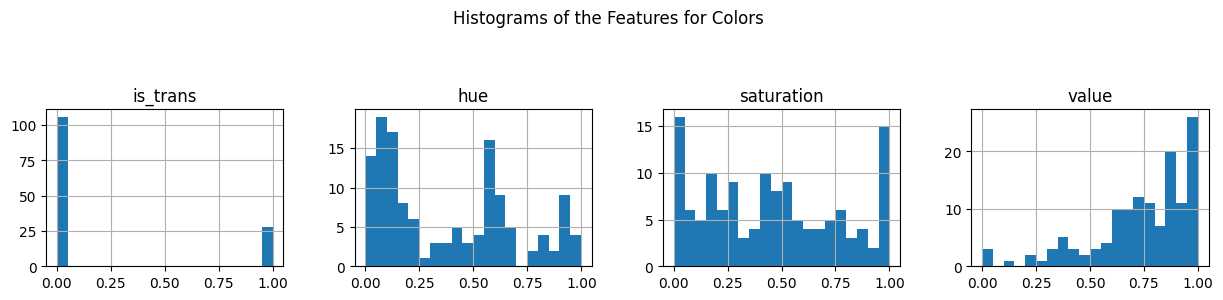

In [54]:
# Histograms for each feature of colors (with HSV)
colors_mod_no_id.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of the Features for Colors')
plt.show()

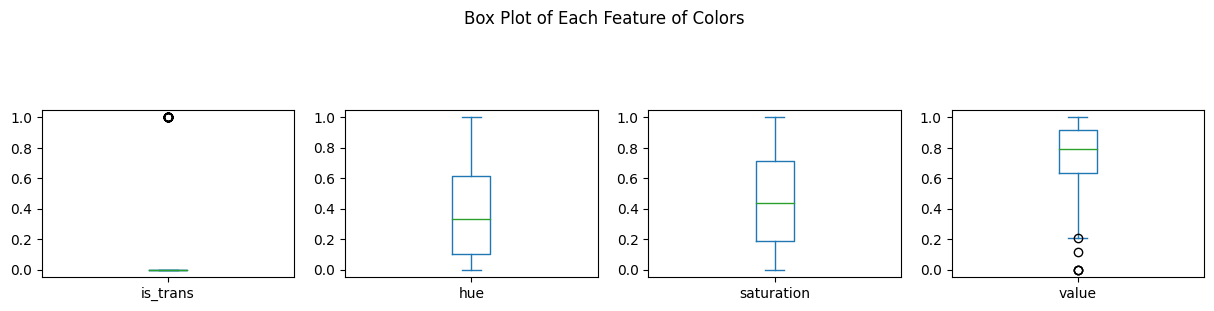

In [55]:
# Box plots for each feature of colors (with HSV) to check for outliers
colors_mod_no_id.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), title='Box Plot of Each Feature of Colors')
plt.show()

In [56]:
# Get quantity of colors
colors_and_parts = pd.merge(inventory_parts_df, colors_modified, left_on='color_id', right_on='id')
#Group colors by quantity
color_quantities = colors_and_parts.groupby(['name', 'rgb', 'hue', 'saturation', 'value'])['quantity']
#Describe color quantities
#print(color_quantities.describe())
#Get total counts
total_color_quantities = color_quantities.count().sort_values().reset_index();
#Get mean counts
mean_color_quantities = color_quantities.mean().sort_values().reset_index();
#Get median counts
median_color_quantities = color_quantities.median().sort_values().reset_index();
# Describe TOTAL color quantities
total_color_quantities.describe()
# Describe MEAN color quantities
#mean_color_quantities.describe()
# Describe MEDIAN color quantities
#median_color_quantities.describe()

,hue,saturation,value,quantity
count,130.000000,130.000000,130.000000,130.000000
mean,0.386174,0.455151,0.740392,4446.200000
std,0.309579,0.320084,0.230392,14361.917053
min,0.000000,0.000000,0.000000,1.000000
25%,0.104470,0.187192,0.631373,24.000000
50%,0.348333,0.437277,0.790196,230.500000
75%,0.612580,0.716530,0.910784,1968.750000
max,0.998333,1.000000,1.000000,115176.000000


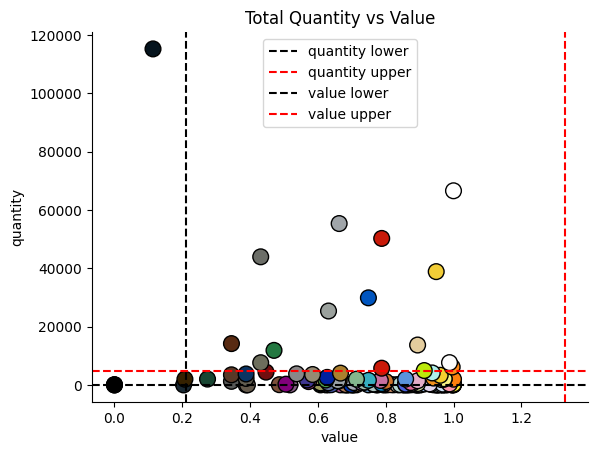

In [57]:
# Calculate outliers for quantity and the HSV value, and then plot Quantity versus Hue, Saturation, and Value
def color_scatter_plot(parameter, color_data, title):
  quantity_lower, quantity_upper = get_bounds(color_data['quantity'])
  color_data.plot(kind='scatter', x=parameter, y='quantity', s=128, alpha=1, color=color_data['rgb'], edgecolors='black')
  plt.axhline(y=quantity_lower, color='black', linestyle='--', label='quantity lower')
  plt.axhline(y=quantity_upper, color='red', linestyle='--', label='quantity upper')
  parameter_lower, parameter_upper = get_bounds(color_data[parameter])
  plt.axvline(x=parameter_lower, color='black', linestyle='--', label=(parameter+' lower'))
  plt.axvline(x=parameter_upper, color='red', linestyle='--', label=(parameter+' upper'))
  plt.legend()
  plt.title(title)
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Plot scatter plots for total quantities, mean quantities, and median quantities
#color_scatter_plot('hue', total_color_quantities, 'Total Quantity vs Hue')
#color_scatter_plot('saturation', total_color_quantities, 'Total Quantity vs Saturation')
color_scatter_plot('value', total_color_quantities, 'Total Quantity vs Value')

#color_scatter_plot('hue', mean_color_quantities, 'Mean Quantity vs Hue')
#color_scatter_plot('saturation', mean_color_quantities, 'Mean Quantity vs Saturation')
#color_scatter_plot('value', mean_color_quantities, 'Mean Quantity vs Value')

#color_scatter_plot('hue', median_color_quantities, 'Median Quantity vs Hue')
#color_scatter_plot('saturation', median_color_quantities, 'Median Quantity vs Saturation')
#color_scatter_plot('value', median_color_quantities, 'Median Quantity vs Value')

In [58]:
#Get and print the upper outliers for total quantity count, mean quantity, and median quantity
total_quantity_lower, total_quantity_upper = get_bounds(total_color_quantities['quantity'])
mean_quantity_lower, mean_quantity_upper = get_bounds(mean_color_quantities['quantity'])
median_quantity_lower, median_quantity_upper = get_bounds(median_color_quantities['quantity'])
# Total Quantity Count
upper_total_color_outliers = total_color_quantities[total_color_quantities['quantity'] > total_quantity_upper]
display(upper_total_color_outliers)
# Mean Quantity
upper_mean_color_outliers = mean_color_quantities[mean_color_quantities['quantity'] > mean_quantity_upper]
display(upper_mean_color_outliers)
# Median Quantity
upper_median_color_outliers = median_color_quantities[median_color_quantities['quantity'] > median_quantity_upper]
display(upper_median_color_outliers)

,name,rgb,hue,saturation,value,quantity
114,Lime,"(0.7333333333333333, 0.9137254901960784, 0.043...",0.201201,0.952790,0.913725,4930
115,Trans-Red,"(0.788235294117647, 0.10196078431372549, 0.035...",0.014757,0.955224,0.788235,5731
116,Orange,"(0.996078431372549, 0.5411764705882353, 0.0941...",0.082609,0.905512,0.996078,6130
117,Dark Gray,"(0.42745098039215684, 0.43137254901960786, 0.3...",0.175926,0.163636,0.431373,7611
118,Trans-Clear,"(0.9882352941176471, 0.9882352941176471, 0.988...",0.000000,0.000000,0.988235,7642
119,Green,"(0.13725490196078433, 0.47058823529411764, 0.2...",0.392157,0.708333,0.470588,11843
120,Tan,"(0.8941176470588236, 0.803921568627451, 0.6196...",0.111905,0.307018,0.894118,13681
121,Reddish Brown,"(0.34509803921568627, 0.16470588235294117, 0.0...",0.057143,0.795455,0.345098,14168
122,Light Gray,"(0.6078431372549019, 0.6313725490196078, 0.615...",0.388889,0.037267,0.631373,25339
123,Blue,"(0.0, 0.3333333333333333, 0.7490196078431373)",0.592496,1.000000,0.749020,29857


,name,rgb,hue,saturation,value,quantity
127,Maersk Blue,"(0.20784313725490197, 0.5725490196078431, 0.76...",0.557512,0.728205,0.764706,6.316940
128,Sand Green,"(0.6274509803921569, 0.7372549019607844, 0.674...",0.404762,0.148936,0.737255,6.845287
129,Sand Red,"(0.8392156862745098, 0.4588235294117647, 0.447...",0.005000,0.467290,0.839216,12.840909


,name,rgb,hue,saturation,value,quantity
129,Maersk Blue,"(0.20784313725490197, 0.5725490196078431, 0.76...",0.557512,0.728205,0.764706,4.0


In [59]:
# Merge inventory with colors
# Prep inventory
modified_inventory_parts = inventory_parts_df
# replace f and t for is_spare with 0 and 1
modified_inventory_parts['is_spare'] = modified_inventory_parts['is_spare'].apply(lambda x: 1 if x == 't' else 0)
# Merge inventory datasets together
everything_is_awesome = inventories_df.rename(columns={'id': 'inventory_id'})
everything_is_awesome = pd.merge(inventory_parts_df, everything_is_awesome, on='inventory_id')
# Merge with colors
merge_colors = colors_modified.rename(columns={'id': 'color_id'})
# Big merge
everything_is_awesome = pd.merge(everything_is_awesome, merge_colors, on='color_id')
everything_is_awesome = everything_is_awesome.rename(columns={'name': 'color_name'})
everything_is_awesome = pd.merge(everything_is_awesome, sets_df, on='set_num')
everything_is_awesome = everything_is_awesome.drop(columns={'color_id', 'inventory_id', 'theme_id'})
#display(everything_is_awesome.head())

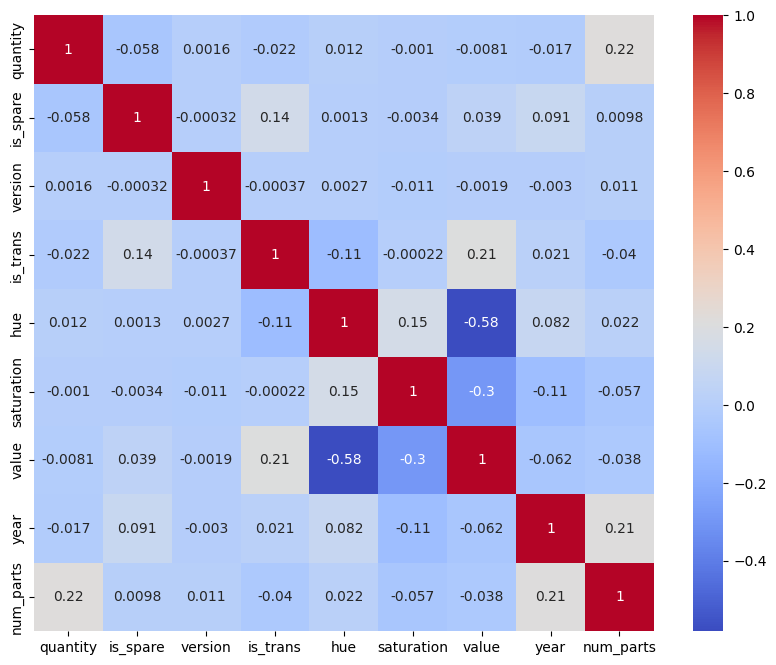

In [60]:
# Correlation map of color features with inventory part features and set features
everything_is_numbers = everything_is_awesome.select_dtypes(['number'])
corr = everything_is_numbers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
# NOTE: Sometimes a row/column won't show up, so you may have to reload the datasets.

In [61]:
# find top level themes
themes_extended = copy.deepcopy(themes_df)
themes_df['parent_id'] = themes_df['parent_id'].fillna(0).astype(int)
# recursive function
def find_id(id):
  for index, row in themes_df.iterrows():
    if(id == row['id']):
      if(row['parent_id'] == 0): # NaN
        return [id, row['name']]
      else:
        return find_id(row['parent_id'])
  return 0
ids = []
names = []
for index, row in themes_df.iterrows():
    out = find_id(row['parent_id']) # recurse through parent_ids
    if(out == 0): # top theme is its own top theme
      out = [row['id'], row['name']]
    ids.append(out[0])
    names.append(out[1])

themes_extended['top_level_theme_id'] = ids
themes_extended['top_level_theme_name'] = names

count_top_level_themes = len(themes_extended.top_level_theme_name.unique())
count_og_themes = len(themes_df.name.unique())
print("Unique themes: " + str(count_og_themes))
print("Unique top level themes:" + str(count_top_level_themes))

Unique themes: 402
Unique top level themes:111


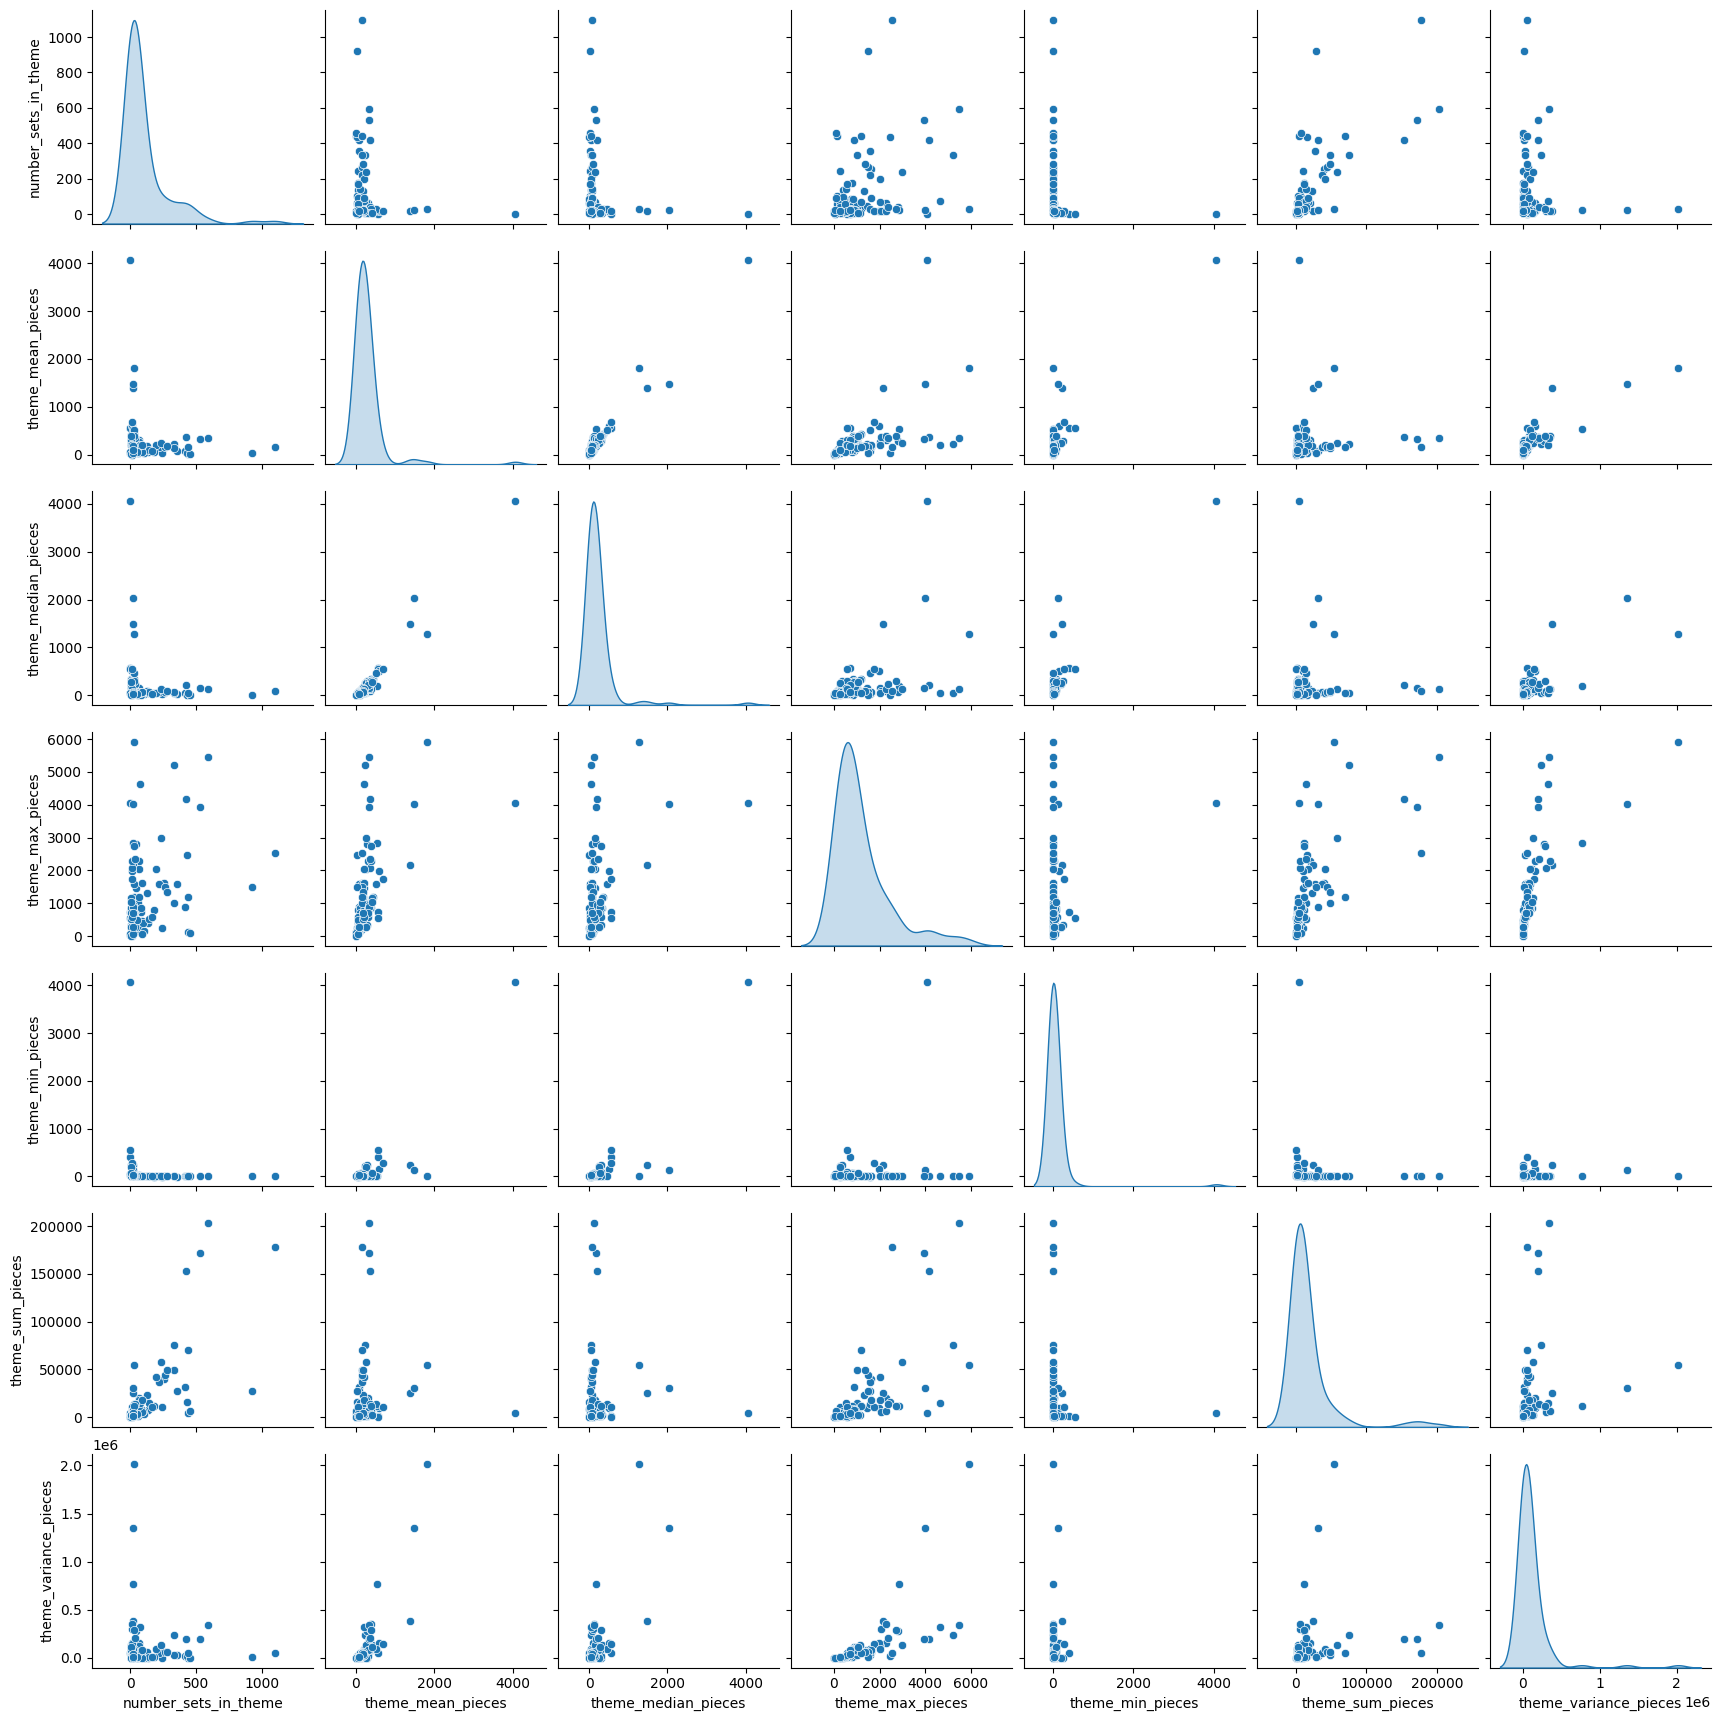

In [62]:
set_themes = pd.merge(sets_df, themes_extended,  how='left', left_on='theme_id', right_on='id')
# create stats by top theme
set_theme_sums = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'sum'}).reset_index()
set_theme_sums.rename(columns={'num_parts': "theme_sum_pieces"}, inplace=True)
set_theme_sizes = set_themes.groupby('top_level_theme_name').size().reset_index()
set_theme_sizes.rename(columns={0:'number_sets_in_theme'}, inplace=True)
set_theme_means = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'mean'}).reset_index()
set_theme_means.rename(columns={'num_parts': "theme_mean_pieces"}, inplace=True)
set_theme_max = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'max'}).reset_index()
set_theme_max.rename(columns={'num_parts': "theme_max_pieces"}, inplace=True)
set_theme_min = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'min'}).reset_index()
set_theme_min.rename(columns={'num_parts': "theme_min_pieces"}, inplace=True)
set_theme_var = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'var'}).reset_index()
set_theme_var.rename(columns={'num_parts': "theme_variance_pieces"}, inplace=True)
set_theme_std = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'std'}).reset_index()
set_theme_std.rename(columns={'num_parts': "theme_std_pieces"}, inplace=True)
set_theme_median = set_themes.groupby('top_level_theme_name').agg({'num_parts': 'median'}).reset_index()
set_theme_median.rename(columns={'num_parts': "theme_median_pieces"}, inplace=True)
# merge all stats together
set_theme_stats = pd.merge(set_theme_sizes, set_theme_means,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_theme_stats = pd.merge(set_theme_stats, set_theme_median,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_theme_stats = pd.merge(set_theme_stats, set_theme_max,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_theme_stats = pd.merge(set_theme_stats, set_theme_min,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_theme_stats = pd.merge(set_theme_stats, set_theme_sums,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_theme_stats = pd.merge(set_theme_stats, set_theme_var,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
#set_theme_stats = pd.merge(set_theme_stats, set_theme_std,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
sns.pairplot(set_theme_stats, diag_kind='kde')

In [63]:
top_sets = set_theme_sizes.sort_values('number_sets_in_theme', ascending=False).head(20)
print(top_sets)
plt.figure(figsize=(10, 4))
#sns.barplot(data=top_sets, x='top_level_theme_name', y='number_sets_in_theme', palette='viridis')
#plt.xticks(rotation=90)
#plt.title('Lego Themes with Most Sets - Top 20')
#plt.xlabel('Theme')
#plt.ylabel('Number of Sets')

        top_level_theme_name  number_sets_in_theme
99                      Town                  1098
83                  Seasonal                   923
90                 Star Wars                   592
93                   Technic                   533
84             Service Packs                   456
21   Collectible Minifigures                   441
102   Universal Building Set                   441
43                      Gear                   433
22                   Creator                   420
11                  Bionicle                   417
19                   Classic                   354
85                     Space                   332
34     Educational and Dacta                   332
101                    Train                   281
79                    Racers                   265
18                    Castle                   256
33                     Duplo                   245
92              Super Heroes                   236
41                   Friends   

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

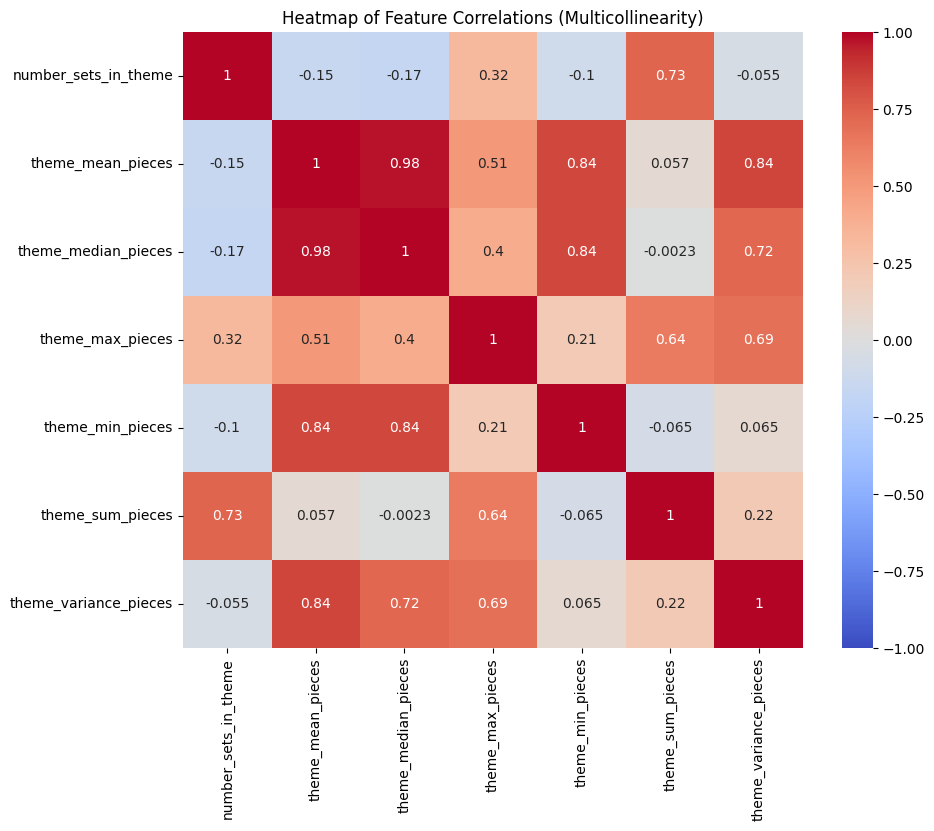

In [64]:
droppedc = set_theme_stats.drop(['top_level_theme_name'], axis=1)
# Calculate the correlation matrix
corr_matrix = droppedc.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Feature Correlations (Multicollinearity)')
plt.show()


In [65]:
set_themes_back_stats = pd.merge(set_themes, set_theme_stats,  how='left', left_on='top_level_theme_name', right_on='top_level_theme_name')
set_themes_back_stats.shape[0]
#set_themes_back_stats.top_level_theme_name.unique()

11673

In [66]:
super_hero_stats = set_themes_back_stats[set_themes_back_stats['top_level_theme_name'] == 'Super Heroes']
super_hero_stats_grouped_by_year = super_hero_stats.groupby('year').size().reset_index()
#plt.bar(super_hero_stats_grouped_by_year['year'], super_hero_stats_grouped_by_year['number_sets_in_theme'])
#plt.show()
#sns.barplot(data=super_hero_stats_grouped_by_year, x='top_level_theme_name', y='number_sets_in_theme', palette='viridis')
#plt.xticks(rotation=90)
#plt.title('Lego Themes with Most Sets - Top 20')
#plt.xlabel('Theme')
#plt.ylabel('Number of Sets')

racers_stats = set_themes_back_stats[set_themes_back_stats['top_level_theme_name'] == 'Racers']
racers_stats_grouped_by_year = racers_stats.groupby('year').size().reset_index()
##plt.bar(racers_stats_grouped_by_year['year'], racers_stats_grouped_by_year['number_sets_in_theme'])
#plt.show()
# do more "cool" theme and see how they stack up on diffrent stats

sw_stats = set_themes_back_stats[set_themes_back_stats['top_level_theme_name'] == 'Star Wars']
sw_stats_grouped_by_year = sw_stats.groupby('year').size().reset_index()
#plt.bar(sw_stats_grouped_by_year['year'], sw_stats_grouped_by_year['number_sets_in_theme'])
#plt.show()

hp_stats = set_themes_back_stats[set_themes_back_stats['top_level_theme_name'] == 'Harry Potter']
hp_stats_grouped_by_year = hp_stats.groupby('year').size().reset_index()
#plt.bar(lotr_stats_grouped_by_year['year'], lotr_stats_grouped_by_year['number_sets_in_theme'])
#plt.show()

Text(0, 0.5, 'Number of Sets')

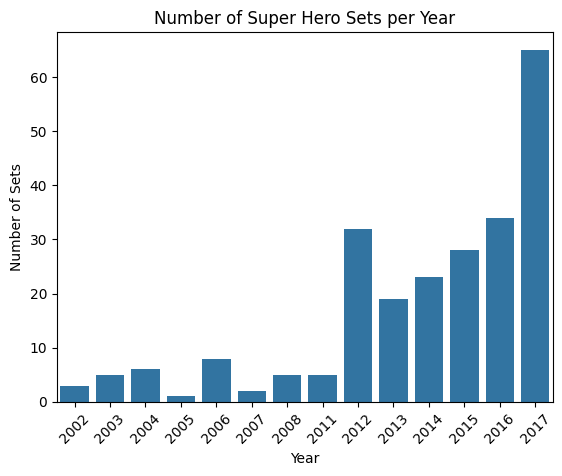

In [67]:

#plt.figure(figsize=(10, 4))
sns.barplot(data=super_hero_stats_grouped_by_year, x='year', y=0)
plt.xticks(rotation=45)
plt.title('Number of Super Hero Sets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')


Text(0, 0.5, 'Number of Sets')

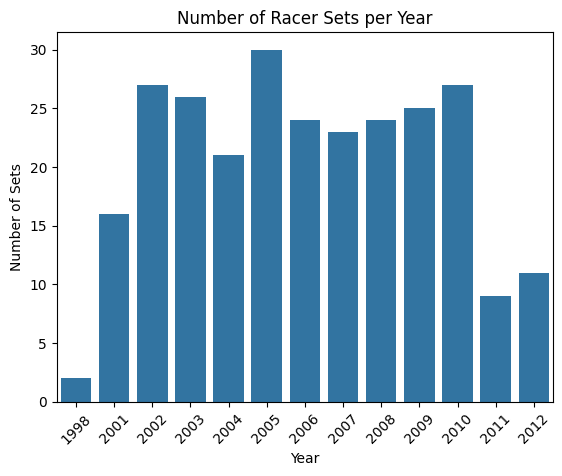

In [68]:
sns.barplot(data=racers_stats_grouped_by_year, x='year', y=0)
plt.xticks(rotation=45)
plt.title('Number of Racer Sets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')

Text(0, 0.5, 'Number of Sets')

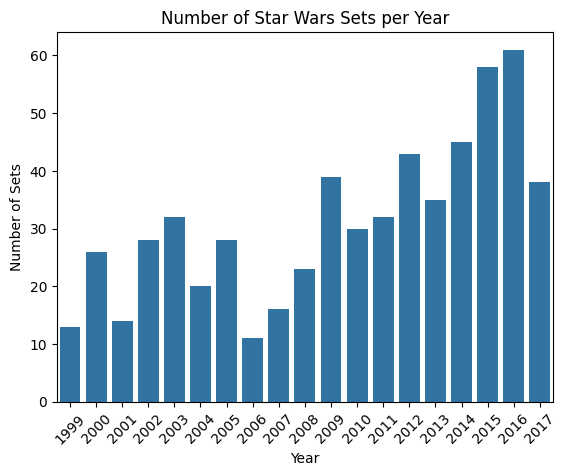

In [69]:
sns.barplot(data=sw_stats_grouped_by_year, x='year', y=0)
plt.xticks(rotation=45)
plt.title('Number of Star Wars Sets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')

Text(0, 0.5, 'Number of Sets')

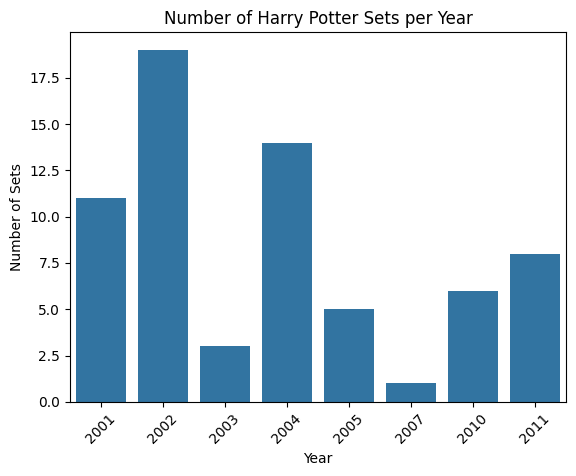

In [70]:
sns.barplot(data=hp_stats_grouped_by_year, x='year', y=0)
plt.xticks(rotation=45)
plt.title('Number of Harry Potter Sets per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')